# Zeeguu API Architecture Reconstruction - Basic Radon Analysis

This notebook provides a comprehensive analysis of the Zeeguu API (backend) code using Radon – a Python tool for computing various code metrics. We will extract architectural insights using metrics such as:

1. **Cyclomatic Complexity (CC):** Identifies overly complex functions.
2. **Maintainability Index (MI):** Evaluates overall maintainability of modules.
3. **Raw Metrics:** Counts lines of code (LOC, LLOC, SLOC) and comment ratios.

These metrics will help us construct various architectural viewpoints.

In [55]:
import os
import sys
import subprocess

def install_package(package):
    try:
        __import__(package.replace('-', '_'))
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install radon and additional packages for visualization
install_package('radon')
install_package('matplotlib')
install_package('pandas')
install_package('networkx')
install_package('pydot')
install_package('squarify')

# Verify Radon installation by printing its version
try:
    subprocess.check_call([sys.executable, "-m", "radon", "--version"])
except Exception as e:
    print("Error calling radon. Please ensure it is installed properly.")

radon is already installed.
matplotlib is already installed.
pandas is already installed.
networkx is already installed.
pydot is already installed.
squarify is already installed.


## 1. Basic Project Structure Analysis

We'll begin by listing the directory structure for the API. On Windows, we replace the Unix shell commands with Python functions.

In [56]:
def list_directories(root_dir):
    dirs = []
    for dirpath, dirnames, _ in os.walk(root_dir):
        # Exclude hidden directories
        dirnames[:] = [d for d in dirnames if not d.startswith('.')]
        dirs.append(os.path.relpath(dirpath, root_dir))
    return sorted(dirs)

print("API (Backend) Structure:")
for d in list_directories(os.path.join('..', 'Data', 'api')):
    print(d)

API (Backend) Structure:
.
__pycache__
tools
tools\__pycache__
tools\crawl_summary
tools\migrations
tools\old
tools\old\__pycache__
tools\old\es_v8_migration
tools\old\es_v8_migration\__pycache__
tools\report_generator
tools\sh
tools\sql
zeeguu
zeeguu\__pycache__
zeeguu\api
zeeguu\api\__pycache__
zeeguu\api\endpoints
zeeguu\api\endpoints\__pycache__
zeeguu\api\endpoints\helpers
zeeguu\api\endpoints\teacher_dashboard
zeeguu\api\test
zeeguu\api\test\__pycache__
zeeguu\api\utils
zeeguu\cl
zeeguu\config
zeeguu\config\__pycache__
zeeguu\core
zeeguu\core\__pycache__
zeeguu\core\account_management
zeeguu\core\behavioral_modeling
zeeguu\core\bookmark_quality
zeeguu\core\content_cleaning
zeeguu\core\content_cleaning\__pycache__
zeeguu\core\content_cleaning\data
zeeguu\core\content_quality
zeeguu\core\content_recommender
zeeguu\core\content_retriever
zeeguu\core\content_retriever\__pycache__
zeeguu\core\crowd_translations
zeeguu\core\definition_of_learned
zeeguu\core\diagrams
zeeguu\core\elastic

In [57]:
def count_python_files(root_dir):
    count = 0
    for dirpath, _, files in os.walk(root_dir):
        for f in files:
            if f.endswith('.py'):
                count += 1
    return count

api_count = count_python_files(os.path.join('..', 'Data', 'api'))

print("Number of Python files in API (Backend): ", api_count)

Number of Python files in API (Backend):  357


## 2-5 API Files Analysis

In [58]:
import os
import sys
import subprocess

# Determine base directories.
# Notebook is in:
# C:\Programming\Architecture\ArchitecturalRecovery\Tools\radon.ipynb
TOOLS_DIR = os.getcwd()  # Expected: ...\Tools
BASE_DIR = os.path.abspath(os.path.join(TOOLS_DIR, '..'))
API_DIR = os.path.join(BASE_DIR, 'Data', 'api')
  
def run_and_print(command):
    print("Running command:", ' '.join(command))
    result = subprocess.run(command, capture_output=True, text=True)
    if result.stdout:
        print(result.stdout)
    if result.stderr:
        print(result.stderr)

# 2. Cyclomatic Complexity Analysis
print("API Cyclomatic Complexity:")
run_and_print([sys.executable, "-m", "radon", "cc", API_DIR, "-s", "-a"])

# 3. Maintainability Index Analysis
print("API Maintainability Index:")
run_and_print([sys.executable, "-m", "radon", "mi", API_DIR])

# 4. Top 10 Most Complex Files
print("Top 10 Most Complex Files in API:")
run_and_print([sys.executable, "-m", "radon", "cc", API_DIR, "-s", "-n", "C", "-o", "SCORE"])

# 5. Raw Metrics Analysis
print("API Raw Metrics:")
run_and_print([sys.executable, "-m", "radon", "raw", API_DIR, "-s"])

API Cyclomatic Complexity:
Running command: c:\ProgramData\anaconda3\python.exe -m radon cc c:\Programming\Architecture\ArchitecturalRecovery\Data\api -s -a
c:\Programming\Architecture\ArchitecturalRecovery\Data\api\install_stanza_models.py
    F 8:0 stanza_model_installation - A (2)
c:\Programming\Architecture\ArchitecturalRecovery\Data\api\setup.py
    F 30:0 ntlk_install_packages - A (3)
    C 18:0 DevelopScript - A (2)
    C 24:0 InstallScript - A (2)
    M 19:4 DevelopScript.run - A (1)
    M 25:4 InstallScript.run - A (1)
c:\Programming\Architecture\ArchitecturalRecovery\Data\api\tools\activity_monitor.py
    F 16:0 most_recent_events - A (1)
    F 22:0 datetime_from_utc_to_local - A (1)
    F 30:0 print_event - A (1)
c:\Programming\Architecture\ArchitecturalRecovery\Data\api\tools\add_feed.py
    F 19:0 main - A (4)
    F 11:0 create_and_test_feed - A (2)
c:\Programming\Architecture\ArchitecturalRecovery\Data\api\tools\add_images_to_articles.py
    F 21:0 add_image_to_articles -

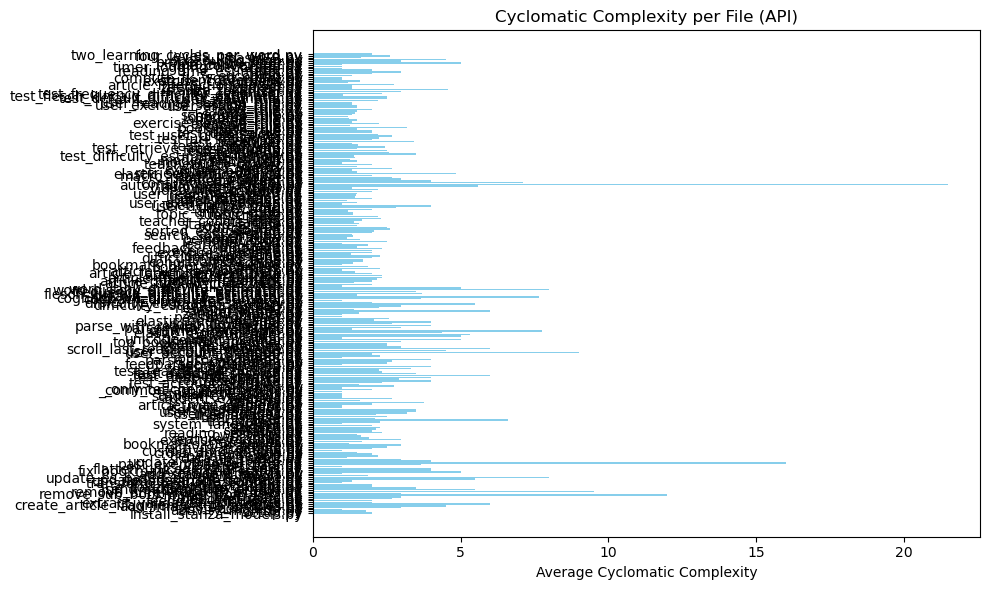

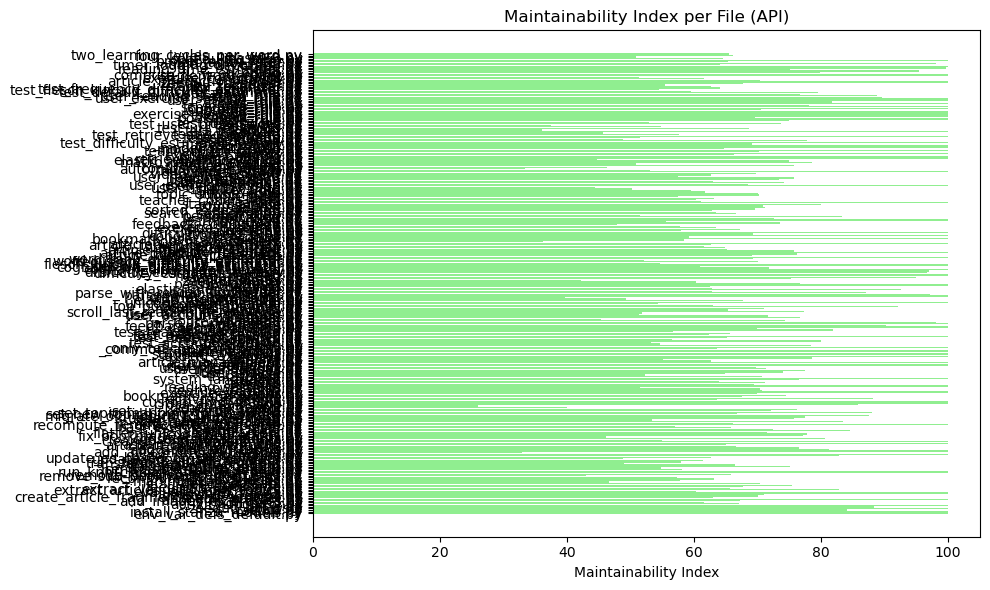

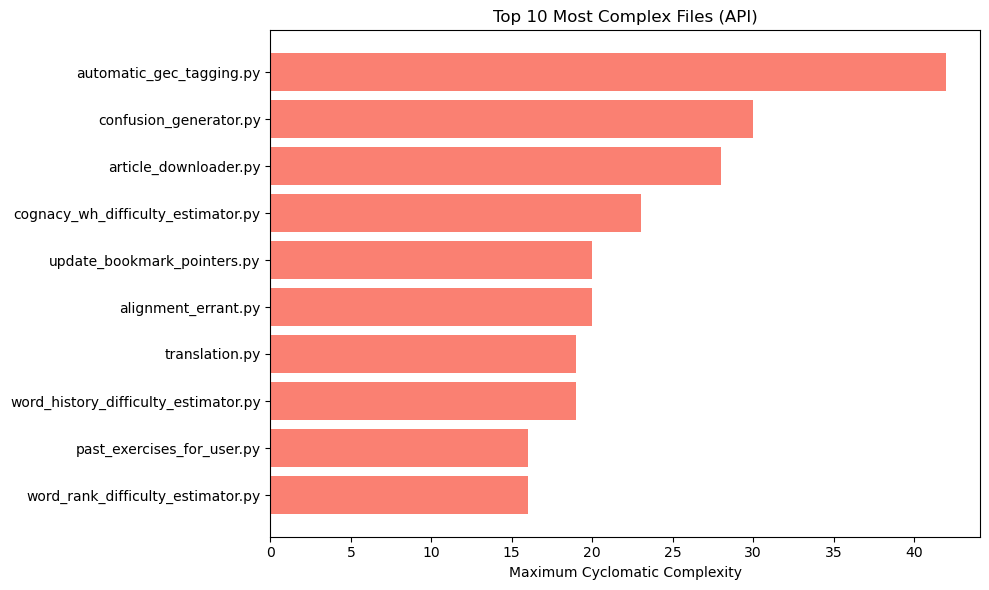

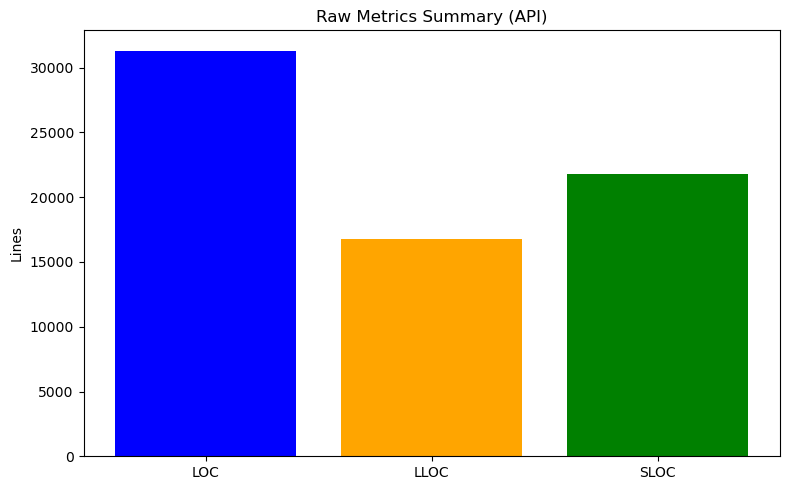

In [59]:
# Visualization

import os
import sys
import subprocess
import json
import matplotlib.pyplot as plt
from pathlib import Path

# Determine base directories.
TOOLS_DIR = os.getcwd()  # Expected: ...\Tools
BASE_DIR = os.path.abspath(os.path.join(TOOLS_DIR, '..'))
API_DIR = os.path.join(BASE_DIR, 'Data', 'api')

def get_json_output(command):
    result = subprocess.run(command, capture_output=True, text=True)
    return json.loads(result.stdout)

# --- Cyclomatic Complexity Analysis ---
cc_command = [sys.executable, "-m", "radon", "cc", API_DIR, "-j", "-s", "-a"]
cc_data = get_json_output(cc_command)

# Compute average CC per file.
files = []
avg_complexities = []
for filepath, funcs in cc_data.items():
    complexities = [func["complexity"] for func in funcs]
    avg_cc = sum(complexities) / len(complexities) if complexities else 0
    files.append(Path(filepath).name)
    avg_complexities.append(avg_cc)

plt.figure(figsize=(10, 6))
plt.barh(files, avg_complexities, color='skyblue')
plt.xlabel("Average Cyclomatic Complexity")
plt.title("Cyclomatic Complexity per File (API)")
plt.tight_layout()
plt.show()

# --- Maintainability Index Analysis ---
mi_command = [sys.executable, "-m", "radon", "mi", API_DIR, "-j"]
mi_data = get_json_output(mi_command)

files_mi = []
mi_values = []
for filepath, value in mi_data.items():
    mi = value.get("mi", 0) if isinstance(value, dict) else value
    files_mi.append(Path(filepath).name)
    mi_values.append(mi)

plt.figure(figsize=(10, 6))
plt.barh(files_mi, mi_values, color='lightgreen')
plt.xlabel("Maintainability Index")
plt.title("Maintainability Index per File (API)")
plt.tight_layout()
plt.show()

# --- Top 10 Most Complex Files ---
file_max_cc = []
max_cc = []
for filepath, funcs in cc_data.items():
    if funcs:
        file_complexity = max(func["complexity"] for func in funcs)
        file_max_cc.append(Path(filepath).name)
        max_cc.append(file_complexity)

# Select top 10 files.
top_files = sorted(zip(file_max_cc, max_cc), key=lambda x: x[1], reverse=True)[:10]
top_names, top_values = zip(*top_files)

plt.figure(figsize=(10, 6))
plt.barh(top_names, top_values, color='salmon')
plt.xlabel("Maximum Cyclomatic Complexity")
plt.title("Top 10 Most Complex Files (API)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Raw Metrics Analysis ---
raw_command = [sys.executable, "-m", "radon", "raw", API_DIR, "-j", "-s"]
raw_data = get_json_output(raw_command)

# Sum LOC, LLOC, and SLOC across all files.
total_loc = sum(stats.get("loc", 0) for stats in raw_data.values())
total_lloc = sum(stats.get("lloc", 0) for stats in raw_data.values())
total_sloc = sum(stats.get("sloc", 0) for stats in raw_data.values())

labels = ['LOC', 'LLOC', 'SLOC']
values = [total_loc, total_lloc, total_sloc]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.ylabel("Lines")
plt.title("Raw Metrics Summary (API)")
plt.tight_layout()
plt.show()


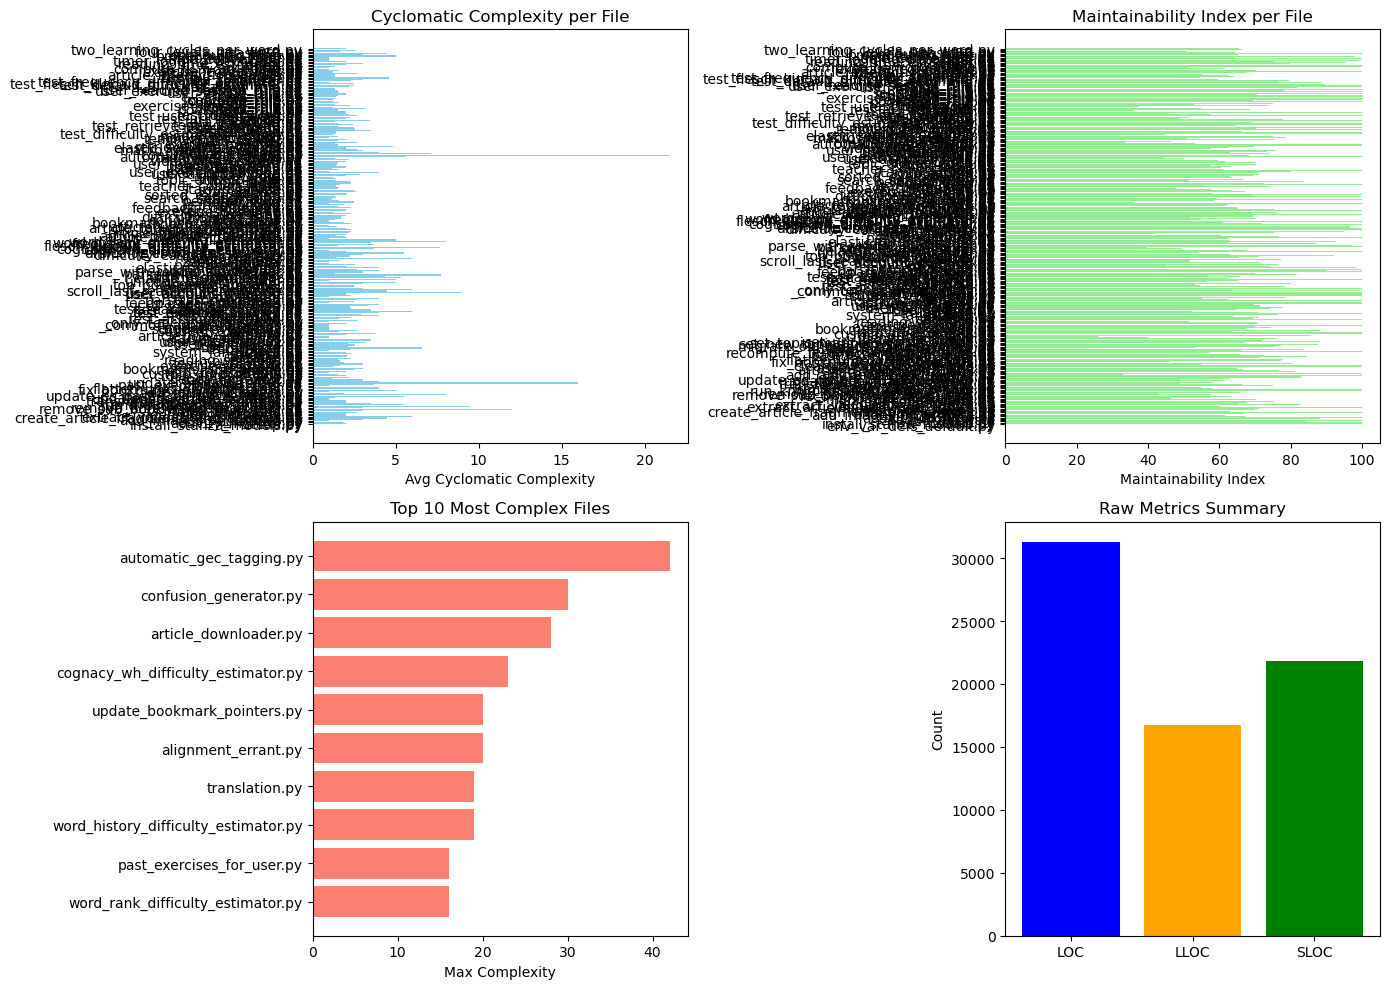

In [60]:
# More visualzation

import os
import sys
import subprocess
import json
import matplotlib.pyplot as plt
from pathlib import Path

def run_radon_command(command):
    """Execute a Radon command and return the parsed JSON output."""
    result = subprocess.run(command, capture_output=True, text=True)
    try:
        return json.loads(result.stdout)
    except json.JSONDecodeError:
        print("Error decoding JSON output from:", ' '.join(command))
        return {}

def plot_overall_metrics(api_dir):
    # --- Cyclomatic Complexity Data ---
    cc_command = [sys.executable, "-m", "radon", "cc", api_dir, "-j", "-s", "-a"]
    cc_data = run_radon_command(cc_command)
    
    files = []
    avg_cc = []
    for filepath, funcs in cc_data.items():
        if funcs:
            complexities = [func['complexity'] for func in funcs]
            files.append(Path(filepath).name)
            avg_cc.append(sum(complexities) / len(complexities))
    
    # --- Maintainability Index Data ---
    mi_command = [sys.executable, "-m", "radon", "mi", api_dir, "-j"]
    mi_data = run_radon_command(mi_command)
    
    mi_files = []
    mi_values = []
    for filepath, value in mi_data.items():
        mi_val = value.get("mi", 0) if isinstance(value, dict) else value
        mi_files.append(Path(filepath).name)
        mi_values.append(mi_val)
    
    # --- Raw Metrics Data ---
    raw_command = [sys.executable, "-m", "radon", "raw", api_dir, "-j", "-s"]
    raw_data = run_radon_command(raw_command)
    total_loc = sum(item.get("loc", 0) for item in raw_data.values())
    total_lloc = sum(item.get("lloc", 0) for item in raw_data.values())
    total_sloc = sum(item.get("sloc", 0) for item in raw_data.values())
    
    # --- Top 10 Most Complex Files ---
    file_max_cc = []
    max_cc = []
    for filepath, funcs in cc_data.items():
        if funcs:
            max_complexity = max(func['complexity'] for func in funcs)
            file_max_cc.append(Path(filepath).name)
            max_cc.append(max_complexity)
    top_files = sorted(zip(file_max_cc, max_cc), key=lambda x: x[1], reverse=True)[:10]
    top_file_names, top_values = zip(*top_files) if top_files else ([], [])
    
    # --- Create Dashboard Subplots ---
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    # CC per file
    axs[0, 0].barh(files, avg_cc, color='skyblue')
    axs[0, 0].set_xlabel("Avg Cyclomatic Complexity")
    axs[0, 0].set_title("Cyclomatic Complexity per File")
    
    # MI per file
    axs[0, 1].barh(mi_files, mi_values, color='lightgreen')
    axs[0, 1].set_xlabel("Maintainability Index")
    axs[0, 1].set_title("Maintainability Index per File")
    
    # Top 10 most complex files
    axs[1, 0].barh(top_file_names, top_values, color='salmon')
    axs[1, 0].set_xlabel("Max Complexity")
    axs[1, 0].set_title("Top 10 Most Complex Files")
    axs[1, 0].invert_yaxis()
    
    # Raw metrics summary
    axs[1, 1].bar(["LOC", "LLOC", "SLOC"], [total_loc, total_lloc, total_sloc], 
                   color=['blue', 'orange', 'green'])
    axs[1, 1].set_ylabel("Count")
    axs[1, 1].set_title("Raw Metrics Summary")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Adjust this path as needed for your environment.
    base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
    api_dir = os.path.join(base_dir, 'Data', 'api')
    plot_overall_metrics(api_dir)


## 2-5 Grouped by Main Package (API Only)

In [61]:
import os
import sys
import json
import subprocess
from collections import defaultdict

def aggregate_cc_by_package(base_dir):
    """Aggregate Cyclomatic Complexity (CC) per package."""
    cmd = [sys.executable, "-m", "radon", "cc", base_dir, "-j", "-s", "-a"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    
    pkg_data = defaultdict(list)
    for filepath, funcs in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        # Use the first folder as the package; if not, label as 'root'
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        for func in funcs:
            pkg_data[pkg].append(func["complexity"])
    
    print("Cyclomatic Complexity (CC) by package:")
    for pkg, complexities in pkg_data.items():
        count = len(complexities)
        avg_complexity = sum(complexities) / count if count else 0
        print(f"  {pkg}: {count} functions, avg CC: {avg_complexity:.2f}")

def aggregate_mi_by_package(base_dir):
    """Aggregate Maintainability Index (MI) per package."""
    # Run radon mi in JSON mode.
    cmd = [sys.executable, "-m", "radon", "mi", base_dir, "-j"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    
    pkg_data = defaultdict(list)
    for filepath, mi_value in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        # If mi_value is a dict, extract the "mi" key; otherwise, use the value directly.
        if isinstance(mi_value, dict):
            pkg_data[pkg].append(mi_value.get("mi", 0))
        else:
            pkg_data[pkg].append(mi_value)
    
    print("Maintainability Index (MI) by package:")
    for pkg, mis in pkg_data.items():
        count = len(mis)
        avg_mi = sum(mis) / count if count else 0
        print(f"  {pkg}: {count} files, avg MI: {avg_mi:.2f}")

def aggregate_raw_by_package(base_dir):
    """Aggregate Raw Metrics (LOC, LLOC, SLOC, comments, etc.) per package."""
    cmd = [sys.executable, "-m", "radon", "raw", base_dir, "-j", "-s"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    
    # Define the metric keys to consider.
    metrics = ["loc", "lloc", "sloc", "comments", "single_comments", "multi", "blank"]
    pkg_totals = defaultdict(lambda: {metric: 0 for metric in metrics})
    pkg_file_count = defaultdict(int)
    
    for filepath, stats in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        pkg_file_count[pkg] += 1
        for metric in metrics:
            pkg_totals[pkg][metric] += stats.get(metric, 0)
    
    print("Raw Metrics by package (averages per file):")
    for pkg in pkg_totals:
        count = pkg_file_count[pkg]
        averages = {metric: pkg_totals[pkg][metric] / count for metric in metrics}
        print(f"  {pkg}: {count} files, averages: {averages}")


if __name__ == "__main__":
    # Set your base directories here.
    api_dir = r"c:\Programming\Architecture\ArchitecturalRecovery\Data\api"
    
    print("===== Aggregated Metrics for API =====")
    aggregate_cc_by_package(api_dir)
    print()
    aggregate_mi_by_package(api_dir)
    print()
    aggregate_raw_by_package(api_dir)
    print()


===== Aggregated Metrics for API =====
Cyclomatic Complexity (CC) by package:
  root: 6 functions, avg CC: 1.83
  tools: 137 functions, avg CC: 2.80
  zeeguu: 1511 functions, avg CC: 2.37

Maintainability Index (MI) by package:
  root: 6 files, avg MI: 95.40
  tools: 70 files, avg MI: 71.73
  zeeguu: 282 files, avg MI: 78.20

Raw Metrics by package (averages per file):
  root: 6 files, averages: {'loc': 31.166666666666668, 'lloc': 12.666666666666666, 'sloc': 17.833333333333332, 'comments': 5.666666666666667, 'single_comments': 5.666666666666667, 'multi': 0.0, 'blank': 7.666666666666667}
  tools: 70 files, averages: {'loc': 79.92857142857143, 'lloc': 43.31428571428572, 'sloc': 61.42857142857143, 'comments': 3.1714285714285713, 'single_comments': 2.8, 'multi': 2.2142857142857144, 'blank': 13.485714285714286}
  zeeguu: 282 files, averages: {'loc': 90.54964539007092, 'lloc': 48.351063829787236, 'sloc': 61.698581560283685, 'comments': 4.1879432624113475, 'single_comments': 3.836879432624113

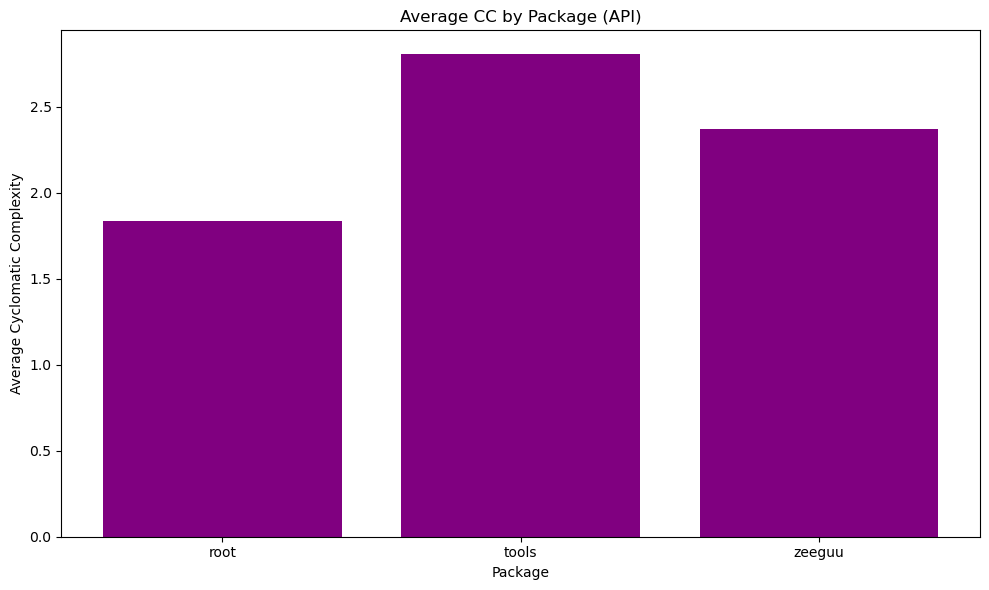

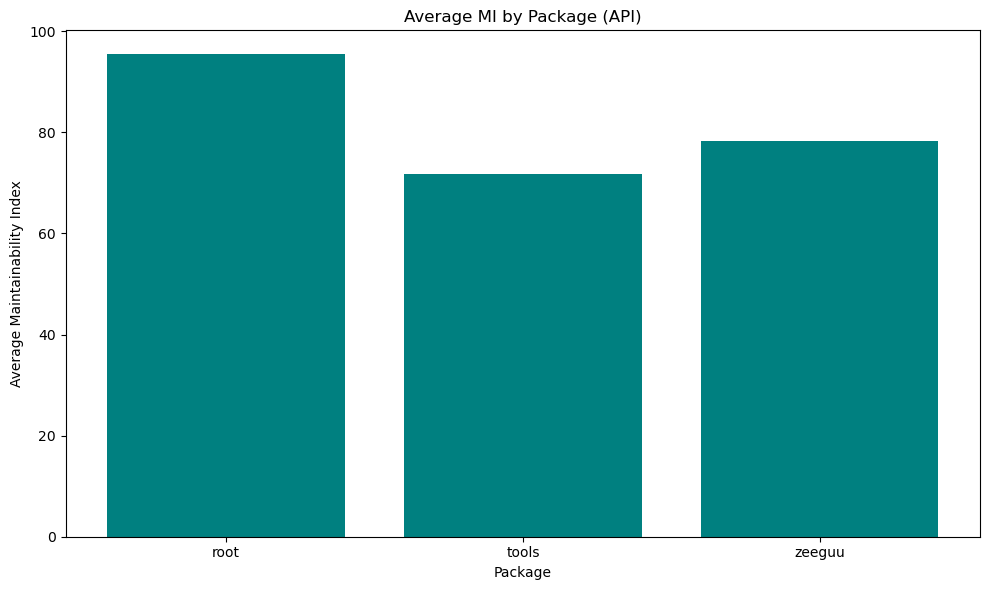

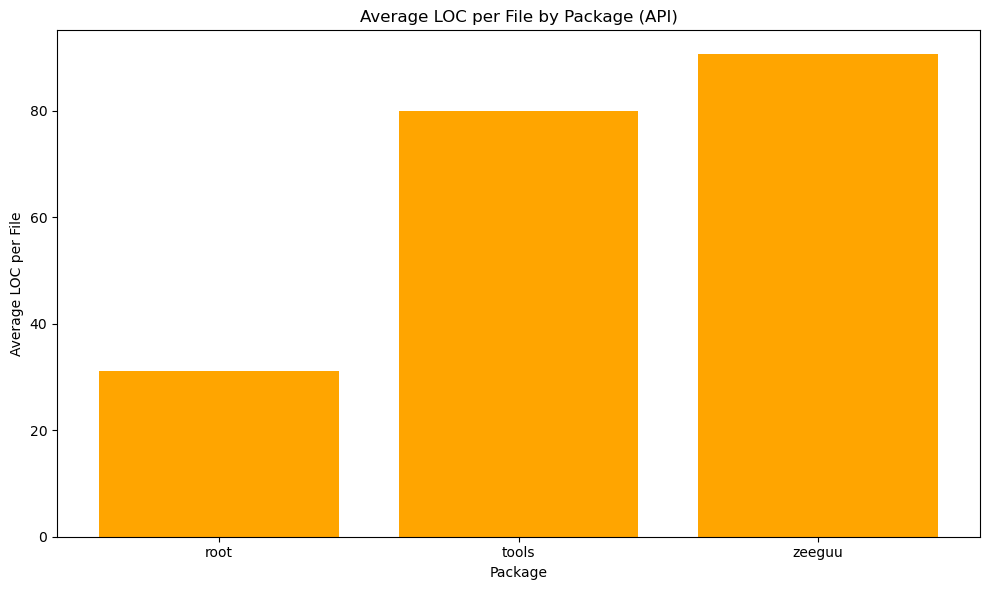

In [74]:
# Visualization

import os
import sys
import json
import subprocess
from collections import defaultdict
import matplotlib.pyplot as plt

def aggregate_cc_by_package(base_dir):
    cmd = [sys.executable, "-m", "radon", "cc", base_dir, "-j", "-s", "-a"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    pkg_data = defaultdict(list)
    for filepath, funcs in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        for func in funcs:
            pkg_data[pkg].append(func["complexity"])
    return pkg_data

def aggregate_mi_by_package(base_dir):
    cmd = [sys.executable, "-m", "radon", "mi", base_dir, "-j"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    pkg_data = defaultdict(list)
    for filepath, mi_value in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        if isinstance(mi_value, dict):
            pkg_data[pkg].append(mi_value.get("mi", 0))
        else:
            pkg_data[pkg].append(mi_value)
    return pkg_data

def aggregate_raw_by_package(base_dir):
    cmd = [sys.executable, "-m", "radon", "raw", base_dir, "-j", "-s"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    metrics = ["loc", "lloc", "sloc", "comments", "single_comments", "multi", "blank"]
    pkg_totals = defaultdict(lambda: {metric: 0 for metric in metrics})
    pkg_file_count = defaultdict(int)
    for filepath, stats in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        pkg_file_count[pkg] += 1
        for metric in metrics:
            pkg_totals[pkg][metric] += stats.get(metric, 0)
    return pkg_totals, pkg_file_count

if __name__ == "__main__":
    api_dir = r"c:\Programming\Architecture\ArchitecturalRecovery\Data\api"
    
    cc_pkg = aggregate_cc_by_package(api_dir)
    mi_pkg = aggregate_mi_by_package(api_dir)
    raw_pkg, pkg_file_count = aggregate_raw_by_package(api_dir)
    
    # Visualize average Cyclomatic Complexity per package.
    pkg_names = []
    avg_cc = []
    for pkg, complexities in cc_pkg.items():
        count = len(complexities)
        avg = sum(complexities) / count if count else 0
        pkg_names.append(pkg)
        avg_cc.append(avg)
    
    plt.figure(figsize=(10, 6))
    plt.bar(pkg_names, avg_cc, color='purple')
    plt.xlabel("Package")
    plt.ylabel("Average Cyclomatic Complexity")
    plt.title("Average CC by Package (API)")
    plt.tight_layout()
    plt.show()
    
    # Visualize average Maintainability Index per package.
    pkg_names_mi = []
    avg_mi = []
    for pkg, mi_values in mi_pkg.items():
        count = len(mi_values)
        avg = sum(mi_values) / count if count else 0
        pkg_names_mi.append(pkg)
        avg_mi.append(avg)
    
    plt.figure(figsize=(10, 6))
    plt.bar(pkg_names_mi, avg_mi, color='teal')
    plt.xlabel("Package")
    plt.ylabel("Average Maintainability Index")
    plt.title("Average MI by Package (API)")
    plt.tight_layout()
    plt.show()
    
    # Visualize average LOC per file per package.
    pkg_names_raw = []
    avg_loc = []
    for pkg, totals in raw_pkg.items():
        count = pkg_file_count[pkg]
        avg = totals["loc"] / count if count else 0
        pkg_names_raw.append(pkg)
        avg_loc.append(avg)
    
    plt.figure(figsize=(10, 6))
    plt.bar(pkg_names_raw, avg_loc, color='orange')
    plt.xlabel("Package")
    plt.ylabel("Average LOC per File")
    plt.title("Average LOC per File by Package (API)")
    plt.tight_layout()
    plt.show()


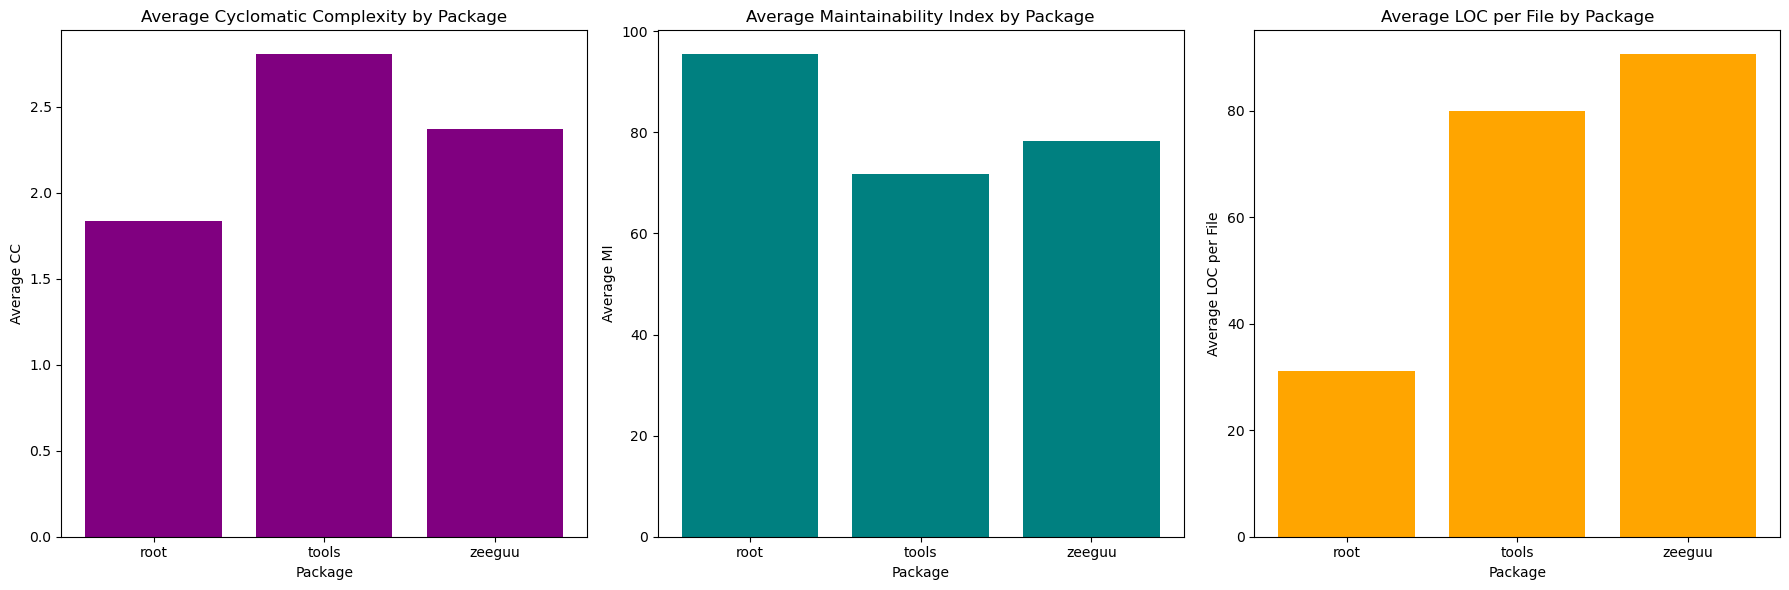

In [63]:
# More visualization
import os
import sys
import json
import subprocess
from collections import defaultdict
import matplotlib.pyplot as plt

def aggregate_metrics_by_package(base_dir):
    # --- Cyclomatic Complexity by Package ---
    cc_cmd = [sys.executable, "-m", "radon", "cc", base_dir, "-j", "-s", "-a"]
    cc_data = json.loads(subprocess.run(cc_cmd, capture_output=True, text=True).stdout)
    cc_pkg = defaultdict(list)
    for filepath, funcs in cc_data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        for func in funcs:
            cc_pkg[pkg].append(func["complexity"])
    
    # --- Maintainability Index by Package ---
    mi_cmd = [sys.executable, "-m", "radon", "mi", base_dir, "-j"]
    mi_data = json.loads(subprocess.run(mi_cmd, capture_output=True, text=True).stdout)
    mi_pkg = defaultdict(list)
    for filepath, value in mi_data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        mi_val = value.get("mi", 0) if isinstance(value, dict) else value
        mi_pkg[pkg].append(mi_val)
    
    # --- Raw Metrics by Package (using LOC as a representative metric) ---
    raw_cmd = [sys.executable, "-m", "radon", "raw", base_dir, "-j", "-s"]
    raw_data = json.loads(subprocess.run(raw_cmd, capture_output=True, text=True).stdout)
    raw_pkg = defaultdict(lambda: {"loc": 0, "files": 0})
    for filepath, stats in raw_data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = relpath.split(os.sep)[0] if os.sep in relpath else "root"
        raw_pkg[pkg]["loc"] += stats.get("loc", 0)
        raw_pkg[pkg]["files"] += 1
    
    # --- Compute Averages ---
    pkg_names = []
    avg_cc = []
    avg_mi = []
    avg_loc = []
    for pkg in cc_pkg.keys():
        pkg_names.append(pkg)
        avg_cc.append(sum(cc_pkg[pkg]) / len(cc_pkg[pkg]) if cc_pkg[pkg] else 0)
        avg_mi.append(sum(mi_pkg[pkg]) / len(mi_pkg[pkg]) if mi_pkg[pkg] else 0)
        avg_loc.append(raw_pkg[pkg]["loc"] / raw_pkg[pkg]["files"] if raw_pkg[pkg]["files"] else 0)
    
    return pkg_names, avg_cc, avg_mi, avg_loc

def plot_metrics_by_package(base_dir):
    pkg_names, avg_cc, avg_mi, avg_loc = aggregate_metrics_by_package(base_dir)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    axs[0].bar(pkg_names, avg_cc, color='purple')
    axs[0].set_xlabel("Package")
    axs[0].set_ylabel("Average CC")
    axs[0].set_title("Average Cyclomatic Complexity by Package")
    
    axs[1].bar(pkg_names, avg_mi, color='teal')
    axs[1].set_xlabel("Package")
    axs[1].set_ylabel("Average MI")
    axs[1].set_title("Average Maintainability Index by Package")
    
    axs[2].bar(pkg_names, avg_loc, color='orange')
    axs[2].set_xlabel("Package")
    axs[2].set_ylabel("Average LOC per File")
    axs[2].set_title("Average LOC per File by Package")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    base_dir = r"c:\Programming\Architecture\ArchitecturalRecovery\Data\api"
    plot_metrics_by_package(base_dir)


## 2-5 Grouped by Subpackages (API Only)

In [75]:
import os
import sys
import json
import subprocess
from collections import defaultdict

def aggregate_cc_by_subpackage(base_dir):
    """Aggregate Cyclomatic Complexity (CC) per subpackage (full relative directory)."""
    cmd = [sys.executable, "-m", "radon", "cc", base_dir, "-j", "-s", "-a"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    
    pkg_data = defaultdict(list)
    for filepath, funcs in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = os.path.dirname(relpath)
        if pkg == "":
            pkg = "root"
        for func in funcs:
            pkg_data[pkg].append(func["complexity"])
    
    print("Cyclomatic Complexity (CC) by subpackage:")
    for pkg, complexities in pkg_data.items():
        count = len(complexities)
        avg_complexity = sum(complexities) / count if count else 0
        print(f"  {pkg}: {count} functions, avg CC: {avg_complexity:.2f}")

def aggregate_mi_by_subpackage(base_dir):
    """Aggregate Maintainability Index (MI) per subpackage (full relative directory)."""
    cmd = [sys.executable, "-m", "radon", "mi", base_dir, "-j"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    
    pkg_data = defaultdict(list)
    for filepath, mi_value in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = os.path.dirname(relpath)
        if pkg == "":
            pkg = "root"
        # If mi_value is a dict, extract the "mi" key; otherwise, use it directly.
        if isinstance(mi_value, dict):
            pkg_data[pkg].append(mi_value.get("mi", 0))
        else:
            pkg_data[pkg].append(mi_value)
    
    print("Maintainability Index (MI) by subpackage:")
    for pkg, mis in pkg_data.items():
        count = len(mis)
        avg_mi = sum(mis) / count if count else 0
        print(f"  {pkg}: {count} files, avg MI: {avg_mi:.2f}")

def aggregate_raw_by_subpackage(base_dir):
    """Aggregate Raw Metrics (LOC, LLOC, SLOC, comments, etc.) per subpackage (full relative directory)."""
    cmd = [sys.executable, "-m", "radon", "raw", base_dir, "-j", "-s"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    
    metrics = ["loc", "lloc", "sloc", "comments", "single_comments", "multi", "blank"]
    pkg_totals = defaultdict(lambda: {metric: 0 for metric in metrics})
    pkg_file_count = defaultdict(int)
    
    for filepath, stats in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = os.path.dirname(relpath)
        if pkg == "":
            pkg = "root"
        pkg_file_count[pkg] += 1
        for metric in metrics:
            pkg_totals[pkg][metric] += stats.get(metric, 0)
    
    print("Raw Metrics by subpackage (averages per file):")
    for pkg in pkg_totals:
        count = pkg_file_count[pkg]
        averages = {metric: pkg_totals[pkg][metric] / count for metric in metrics}
        print(f"  {pkg}: {count} files, averages: {averages}")

if __name__ == "__main__":
    # Set your base directories here.
    api_dir = r"c:\Programming\Architecture\ArchitecturalRecovery\Data\api"
    
    print("===== Aggregated Metrics for API (by subpackage) =====")
    aggregate_cc_by_subpackage(api_dir)
    print()
    aggregate_mi_by_subpackage(api_dir)
    print()
    aggregate_raw_by_subpackage(api_dir)
    print()


===== Aggregated Metrics for API (by subpackage) =====
Cyclomatic Complexity (CC) by subpackage:
  root: 6 functions, avg CC: 1.83
  tools: 47 functions, avg CC: 3.66
  tools\crawl_summary: 26 functions, avg CC: 1.88
  tools\old: 15 functions, avg CC: 5.13
  tools\old\es_v8_migration: 2 functions, avg CC: 3.00
  tools\report_generator: 47 functions, avg CC: 1.70
  zeeguu\api: 4 functions, avg CC: 1.50
  zeeguu\api\endpoints: 155 functions, avg CC: 2.05
  zeeguu\api\endpoints\helpers: 1 functions, avg CC: 1.00
  zeeguu\api\endpoints\teacher_dashboard: 42 functions, avg CC: 2.14
  zeeguu\api\test: 57 functions, avg CC: 2.39
  zeeguu\api\utils: 27 functions, avg CC: 2.26
  zeeguu\config: 6 functions, avg CC: 2.00
  zeeguu\core\account_management: 5 functions, avg CC: 7.20
  zeeguu\core\behavioral_modeling: 2 functions, avg CC: 6.00
  zeeguu\core\bookmark_quality: 13 functions, avg CC: 2.62
  zeeguu\core\content_cleaning: 8 functions, avg CC: 3.50
  zeeguu\core\content_quality: 3 functions

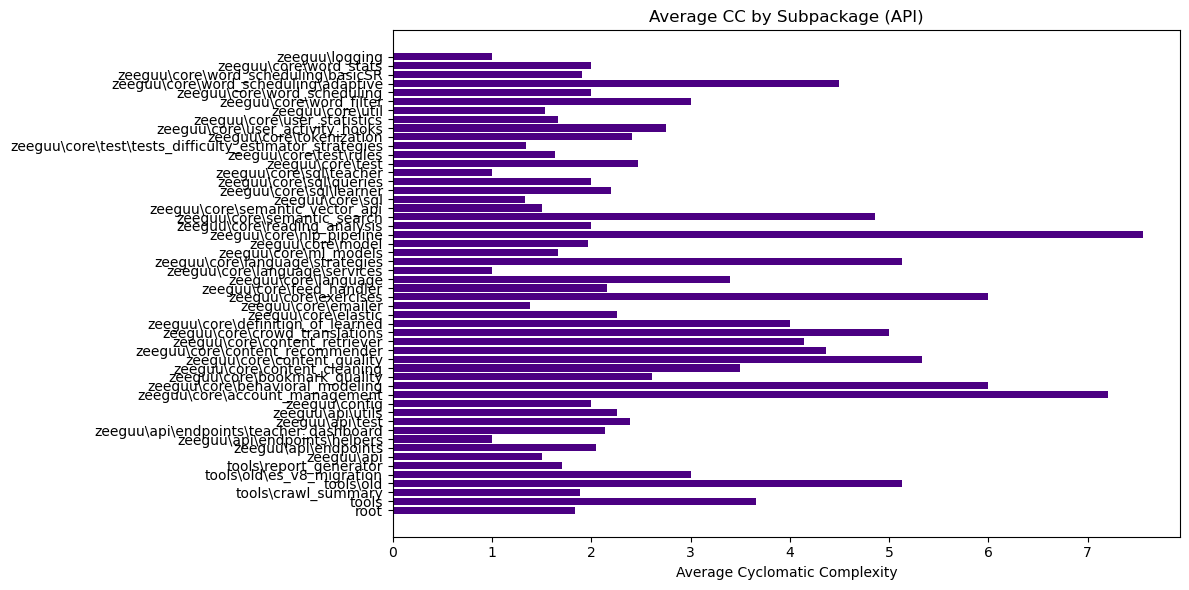

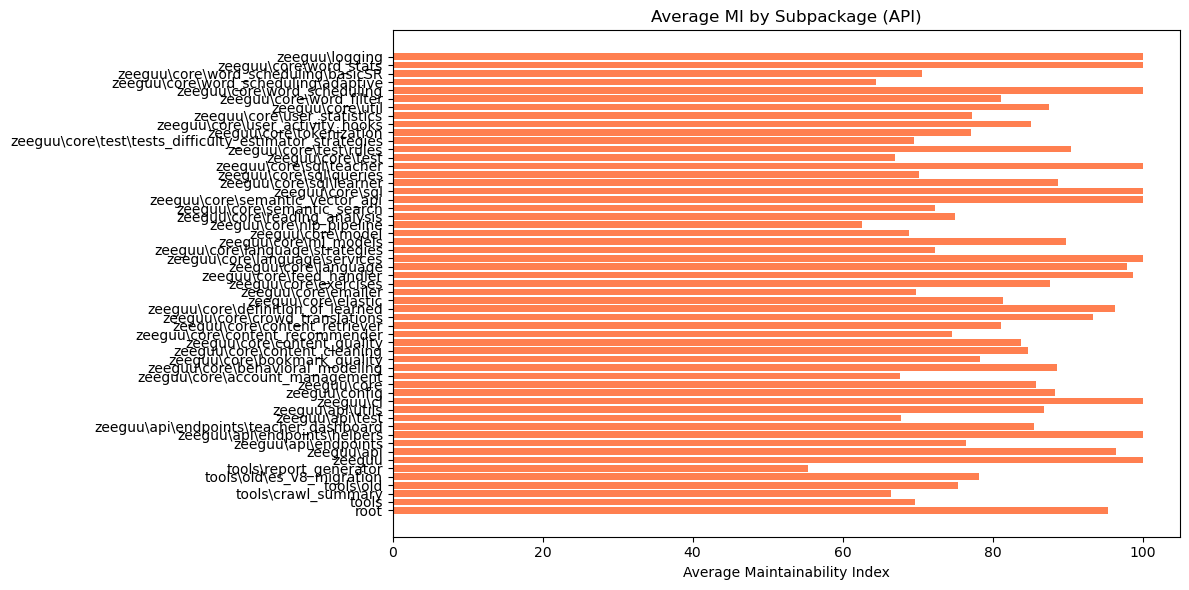

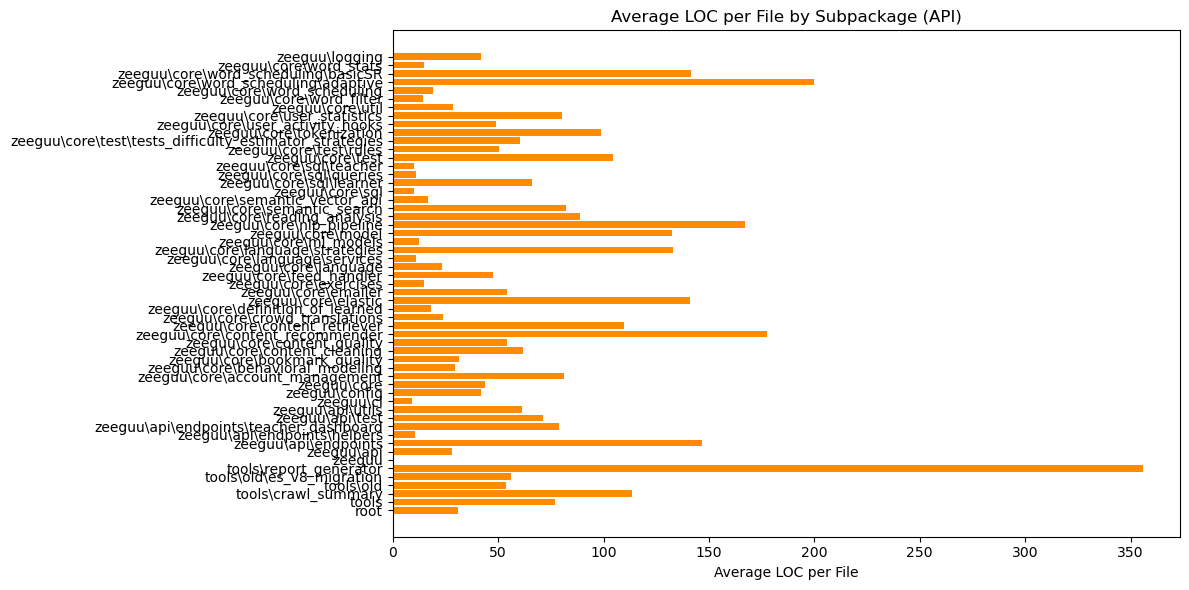

In [76]:
#Visualization
import os
import sys
import json
import subprocess
from collections import defaultdict
import matplotlib.pyplot as plt

def aggregate_cc_by_subpackage(base_dir):
    cmd = [sys.executable, "-m", "radon", "cc", base_dir, "-j", "-s", "-a"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    pkg_data = defaultdict(list)
    for filepath, funcs in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = os.path.dirname(relpath)
        if pkg == "":
            pkg = "root"
        for func in funcs:
            pkg_data[pkg].append(func["complexity"])
    return pkg_data

def aggregate_mi_by_subpackage(base_dir):
    cmd = [sys.executable, "-m", "radon", "mi", base_dir, "-j"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    pkg_data = defaultdict(list)
    for filepath, mi_value in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = os.path.dirname(relpath)
        if pkg == "":
            pkg = "root"
        if isinstance(mi_value, dict):
            pkg_data[pkg].append(mi_value.get("mi", 0))
        else:
            pkg_data[pkg].append(mi_value)
    return pkg_data

def aggregate_raw_by_subpackage(base_dir):
    cmd = [sys.executable, "-m", "radon", "raw", base_dir, "-j", "-s"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)
    metrics = ["loc", "lloc", "sloc", "comments", "single_comments", "multi", "blank"]
    pkg_totals = defaultdict(lambda: {metric: 0 for metric in metrics})
    pkg_file_count = defaultdict(int)
    for filepath, stats in data.items():
        relpath = os.path.relpath(filepath, base_dir)
        pkg = os.path.dirname(relpath)
        if pkg == "":
            pkg = "root"
        pkg_file_count[pkg] += 1
        for metric in metrics:
            pkg_totals[pkg][metric] += stats.get(metric, 0)
    return pkg_totals, pkg_file_count

if __name__ == "__main__":
    api_dir = r"c:\Programming\Architecture\ArchitecturalRecovery\Data\api"
    
    cc_subpkg = aggregate_cc_by_subpackage(api_dir)
    mi_subpkg = aggregate_mi_by_subpackage(api_dir)
    raw_subpkg, subpkg_file_count = aggregate_raw_by_subpackage(api_dir)
    
    # Visualize average CC per subpackage.
    subpkg_names = []
    avg_cc = []
    for subpkg, complexities in cc_subpkg.items():
        count = len(complexities)
        avg = sum(complexities) / count if count else 0
        subpkg_names.append(subpkg)
        avg_cc.append(avg)
    
    plt.figure(figsize=(12, 6))
    plt.barh(subpkg_names, avg_cc, color='indigo')
    plt.xlabel("Average Cyclomatic Complexity")
    plt.title("Average CC by Subpackage (API)")
    plt.tight_layout()
    plt.show()
    
    # Visualize average MI per subpackage.
    subpkg_names_mi = []
    avg_mi = []
    for subpkg, mi_values in mi_subpkg.items():
        count = len(mi_values)
        avg = sum(mi_values) / count if count else 0
        subpkg_names_mi.append(subpkg)
        avg_mi.append(avg)
    
    plt.figure(figsize=(12, 6))
    plt.barh(subpkg_names_mi, avg_mi, color='coral')
    plt.xlabel("Average Maintainability Index")
    plt.title("Average MI by Subpackage (API)")
    plt.tight_layout()
    plt.show()
    
    # Visualize average LOC per file per subpackage.
    subpkg_names_raw = []
    avg_loc = []
    for subpkg, totals in raw_subpkg.items():
        count = subpkg_file_count[subpkg]
        avg = totals["loc"] / count if count else 0
        subpkg_names_raw.append(subpkg)
        avg_loc.append(avg)
    
    plt.figure(figsize=(12, 6))
    plt.barh(subpkg_names_raw, avg_loc, color='darkorange')
    plt.xlabel("Average LOC per File")
    plt.title("Average LOC per File by Subpackage (API)")
    plt.tight_layout()
    plt.show()


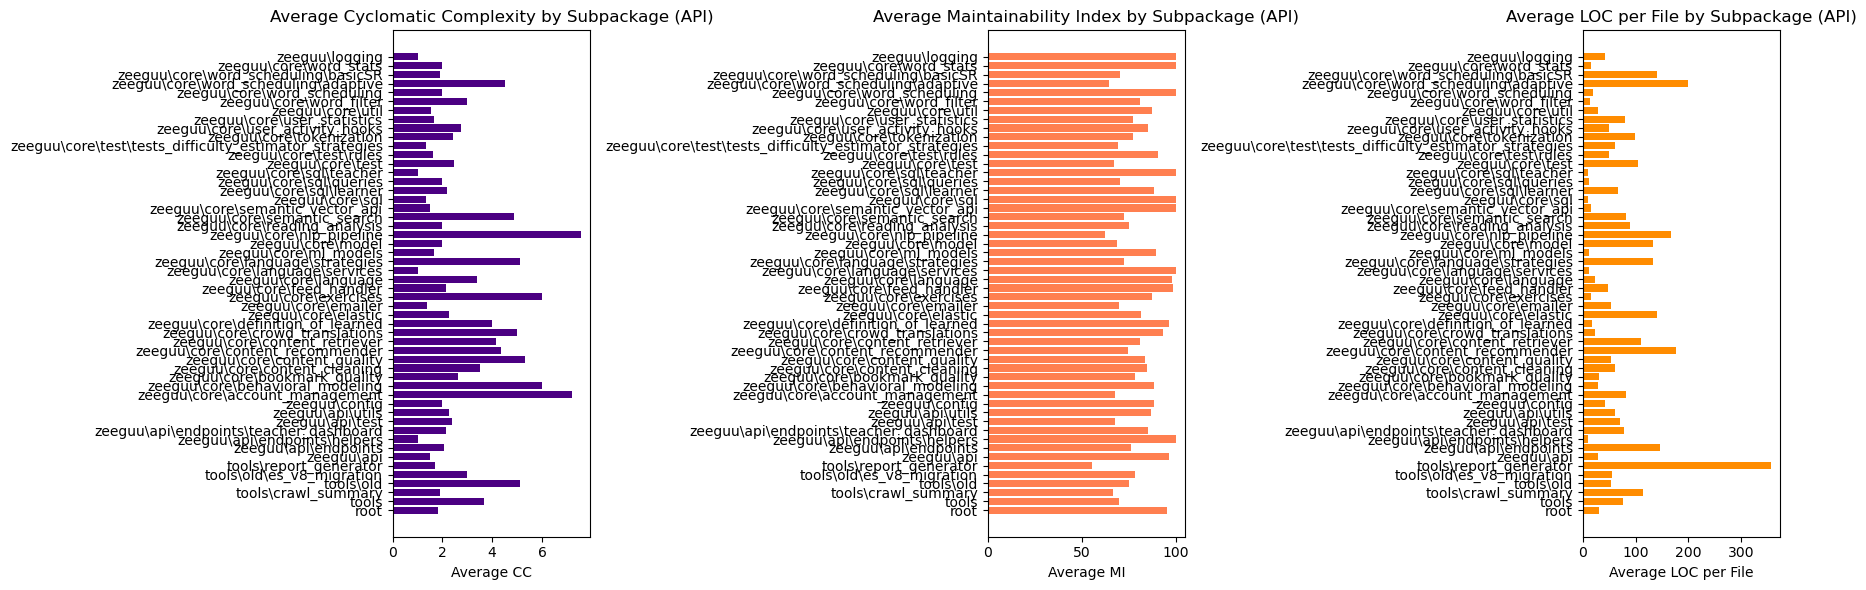

In [66]:
# More visualization
import os
import sys
import json
import subprocess
from collections import defaultdict
import matplotlib.pyplot as plt

def aggregate_metrics_by_subpackage(base_dir):
    # --- Cyclomatic Complexity by Subpackage ---
    cc_cmd = [sys.executable, "-m", "radon", "cc", base_dir, "-j", "-s", "-a"]
    cc_data = json.loads(subprocess.run(cc_cmd, capture_output=True, text=True).stdout)
    cc_subpkg = defaultdict(list)
    for filepath, funcs in cc_data.items():
        relpath = os.path.relpath(filepath, base_dir)
        subpkg = os.path.dirname(relpath)
        if not subpkg:
            subpkg = "root"
        for func in funcs:
            cc_subpkg[subpkg].append(func["complexity"])
    
    # --- Maintainability Index by Subpackage ---
    mi_cmd = [sys.executable, "-m", "radon", "mi", base_dir, "-j"]
    mi_data = json.loads(subprocess.run(mi_cmd, capture_output=True, text=True).stdout)
    mi_subpkg = defaultdict(list)
    for filepath, value in mi_data.items():
        relpath = os.path.relpath(filepath, base_dir)
        subpkg = os.path.dirname(relpath)
        if not subpkg:
            subpkg = "root"
        mi_val = value.get("mi", 0) if isinstance(value, dict) else value
        mi_subpkg[subpkg].append(mi_val)
    
    # --- Raw Metrics by Subpackage (using LOC) ---
    raw_cmd = [sys.executable, "-m", "radon", "raw", base_dir, "-j", "-s"]
    raw_data = json.loads(subprocess.run(raw_cmd, capture_output=True, text=True).stdout)
    raw_subpkg = defaultdict(lambda: {"loc": 0, "files": 0})
    for filepath, stats in raw_data.items():
        relpath = os.path.relpath(filepath, base_dir)
        subpkg = os.path.dirname(relpath)
        if not subpkg:
            subpkg = "root"
        raw_subpkg[subpkg]["loc"] += stats.get("loc", 0)
        raw_subpkg[subpkg]["files"] += 1
    
    # --- Compute Averages ---
    subpkg_names = []
    avg_cc = []
    avg_mi = []
    avg_loc = []
    for subpkg in cc_subpkg.keys():
        subpkg_names.append(subpkg)
        avg_cc.append(sum(cc_subpkg[subpkg]) / len(cc_subpkg[subpkg]) if cc_subpkg[subpkg] else 0)
        avg_mi.append(sum(mi_subpkg[subpkg]) / len(mi_subpkg[subpkg]) if mi_subpkg[subpkg] else 0)
        avg_loc.append(raw_subpkg[subpkg]["loc"] / raw_subpkg[subpkg]["files"] if raw_subpkg[subpkg]["files"] else 0)
    
    return subpkg_names, avg_cc, avg_mi, avg_loc

def plot_metrics_by_subpackage(base_dir):
    subpkg_names, avg_cc, avg_mi, avg_loc = aggregate_metrics_by_subpackage(base_dir)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    axs[0].barh(subpkg_names, avg_cc, color='indigo')
    axs[0].set_xlabel("Average CC")
    axs[0].set_title("Average Cyclomatic Complexity by Subpackage (API)")
    
    axs[1].barh(subpkg_names, avg_mi, color='coral')
    axs[1].set_xlabel("Average MI")
    axs[1].set_title("Average Maintainability Index by Subpackage (API)")
    
    axs[2].barh(subpkg_names, avg_loc, color='darkorange')
    axs[2].set_xlabel("Average LOC per File")
    axs[2].set_title("Average LOC per File by Subpackage (API)")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    base_dir = r"c:\Programming\Architecture\ArchitecturalRecovery\Data\api"
    plot_metrics_by_subpackage(base_dir)


## Radon Visualization (API Only)

In [67]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
import re

def get_complexity_data(directory):
    result = subprocess.run([sys.executable, "-m", "radon", "cc", directory, "-j"], capture_output=True, text=True)
    try:
        data = json.loads(result.stdout)
        return data
    except json.JSONDecodeError:
        print("Error parsing JSON output from radon")
        print("Output:", result.stdout)
        return {}

api_complexity = get_complexity_data(os.path.join('..', 'Data', 'api'))

In [68]:
def process_complexity_data(complexity_data):
    rows = []
    for filename, functions in complexity_data.items():
        module_name = os.path.splitext(os.path.basename(filename))[0]
        package = os.path.basename(os.path.dirname(filename))
        for func in functions:
            rows.append({
                'file': filename,
                'module': module_name,
                'package': package,
                'function': func['name'],
                'complexity': func['complexity'],
                'rank': func['rank']
            })
    return pd.DataFrame(rows)

api_df = process_complexity_data(api_complexity)
print(f"API data contains {len(api_df)} function entries")

API data contains 1654 function entries


## Visualize Package-Level Complexity

We create a bar chart that displays the average cyclomatic complexity per package. Only packages with at least 3 functions are included.

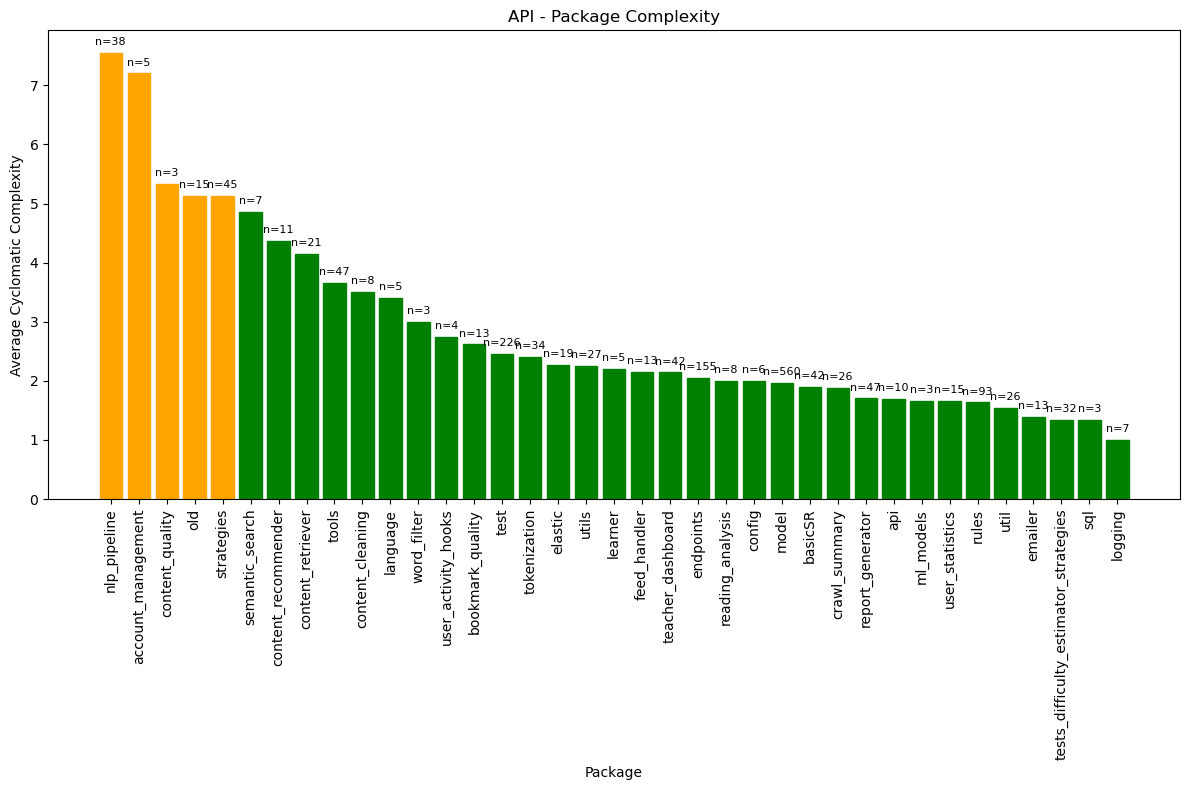

In [69]:
def visualize_package_complexity(df, title):
    package_complexity = df.groupby('package')['complexity'].agg(['mean', 'count'])
    package_complexity = package_complexity.sort_values('mean', ascending=False)
    package_complexity = package_complexity[package_complexity['count'] >= 3]
    
    plt.figure(figsize=(12, 8))
    bars = plt.bar(package_complexity.index, package_complexity['mean'])
    for i, bar in enumerate(bars):
        complexity = package_complexity['mean'].iloc[i]
        if complexity > 10:
            bar.set_color('red')
        elif complexity > 5:
            bar.set_color('orange')
        else:
            bar.set_color('green')
    plt.xlabel('Package')
    plt.ylabel('Average Cyclomatic Complexity')
    plt.title(f'{title} - Package Complexity')
    plt.xticks(rotation=90)
    plt.tight_layout()
    for i, bar in enumerate(bars):
        count = package_complexity['count'].iloc[i]
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'n={count}', ha='center', va='bottom', fontsize=8)
    return plt

if not api_df.empty:
    api_plot = visualize_package_complexity(api_df, 'API')
    api_plot.savefig('api_package_complexity.png')
    api_plot.show()
else:
    print("No API data available for visualization")

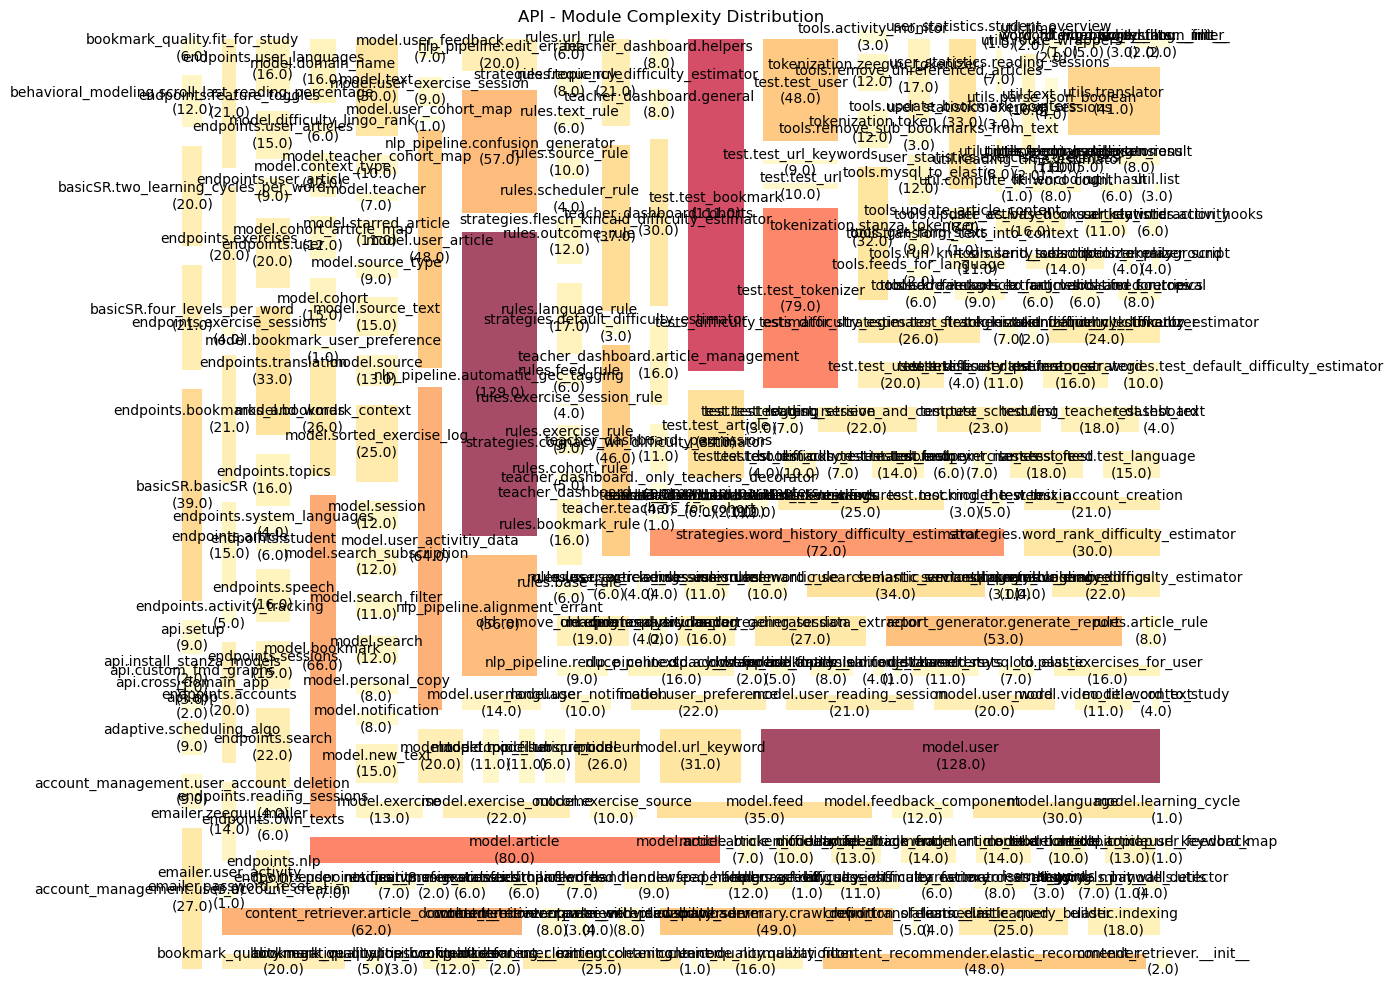

In [70]:
import squarify

def create_complexity_treemap(df, title):
    if df.empty:
        print(f"No data available for {title} treemap")
        return
    module_complexity = df.groupby(['package', 'module'])['complexity'].sum().reset_index()
    norm = plt.Normalize(module_complexity['complexity'].min(), module_complexity['complexity'].max())
    colors = plt.cm.YlOrRd(norm(module_complexity['complexity']))
    plt.figure(figsize=(14, 10))
    squarify.plot(sizes=module_complexity['complexity'], 
                  label=[f"{row['package']}.{row['module']}\n({row['complexity']:.1f})" 
                         for _, row in module_complexity.iterrows()],
                  color=colors, alpha=0.7, pad=True)
    plt.axis('off')
    plt.title(f"{title} - Module Complexity Distribution")
    plt.tight_layout()
    plt.savefig(f"{title.lower()}_module_treemap.png")
    plt.show()

create_complexity_treemap(api_df, 'API')

## Module Dependency Graph

We now construct a module dependency graph by extracting import statements from each Python file. This helps us see how modules depend on one another.

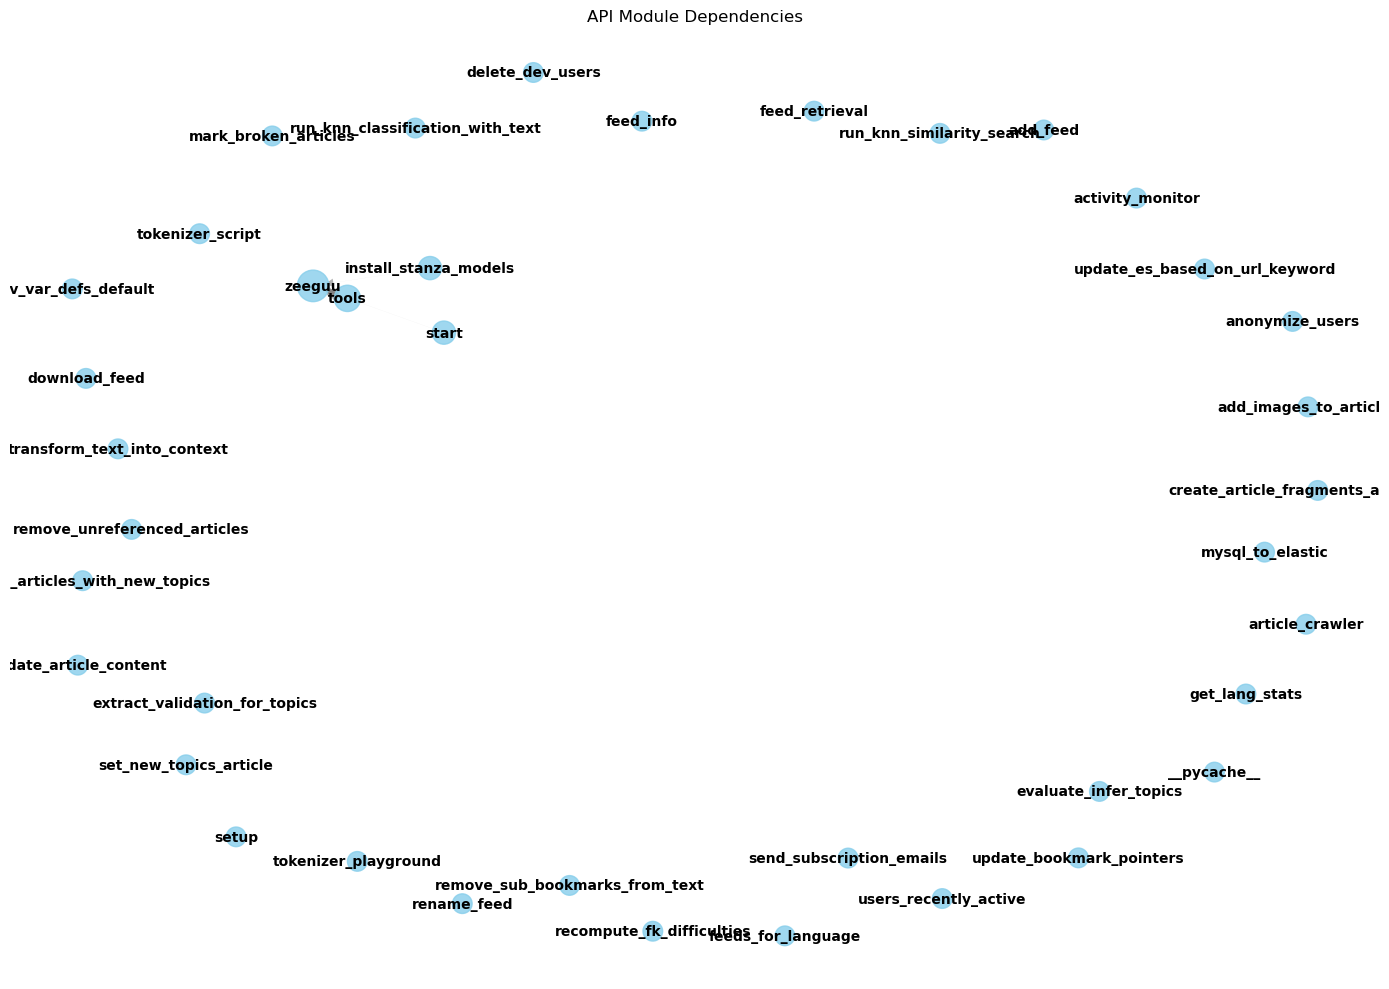

In [71]:
from pathlib import Path

def extract_imports(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        import_pattern = re.compile(r'^\s*(?:from\s+([\w.]+)\s+import\s+|import\s+([\w.,\s]+))', re.MULTILINE)
        matches = import_pattern.findall(content)
        imports = []
        for from_import, direct_import in matches:
            if from_import:
                imports.append(from_import.split('.')[0])
            elif direct_import:
                for module in direct_import.split(','):
                    cleaned = module.strip().split('.')[0]
                    if cleaned:
                        imports.append(cleaned)
        return imports
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

def get_python_files(directory):
    return list(Path(directory).rglob('*.py'))

def identify_project_modules(directory):
    return {d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d)) and not d.startswith('.')}

def create_module_graph(directory):
    python_files = get_python_files(directory)
    project_modules = identify_project_modules(directory)
    for file in python_files:
        if file.parent == Path(directory) or file.parent.parent == Path(directory):
            module_name = file.stem
            if not module_name.startswith('_'):
                project_modules.add(module_name)
    
    import networkx as nx
    G = nx.DiGraph()
    for module in project_modules:
        G.add_node(module)
    
    for file in python_files:
        rel_path = file.relative_to(directory)
        parts = rel_path.parts
        if len(parts) == 1:
            source_module = file.stem
        else:
            source_module = parts[0]
        if file.name == '__init__.py':
            continue
        imports = extract_imports(file)
        for imp in imports:
            if imp in project_modules and imp != source_module:
                if not G.has_edge(source_module, imp):
                    G.add_edge(source_module, imp, weight=1)
                else:
                    G[source_module][imp]['weight'] += 1
    return G

api_graph = create_module_graph(os.path.join('..', 'Data', 'api'))

def visualize_module_graph(G, title):
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.3, iterations=50)
    centrality = nx.degree_centrality(G)
    node_size = [v * 3000 + 200 for v in centrality.values()]
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(edge_weights) if edge_weights else 1
    edge_width = [w/max_weight * 3 for w in edge_weights]
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.6, edge_color='gray', arrowsize=15)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    plt.title(f"{title} Module Dependencies")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"{title.lower()}_module_dependencies.png", dpi=300, bbox_inches='tight')
    plt.show()

if len(api_graph.nodes()) > 0:
    visualize_module_graph(api_graph, "API")
else:
    print("API graph has no nodes to visualize")

## 7. Complexity Heatmap for Core Modules

We now create a horizontal bar chart (heatmap) that displays the average cyclomatic complexity per module for the API.

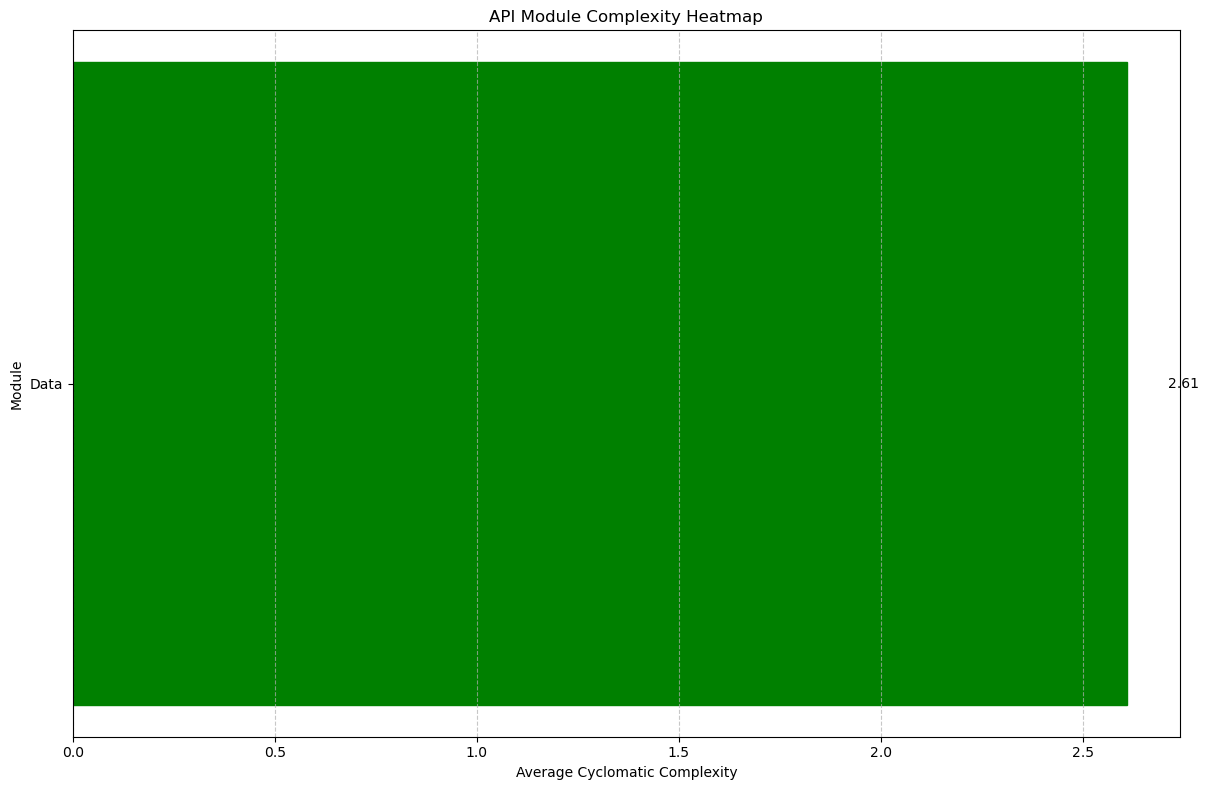

In [72]:
def get_module_complexity(directory):
    result = subprocess.run([sys.executable, "-m", "radon", "cc", directory, "-j"], capture_output=True, text=True)
    try:
        data = json.loads(result.stdout)
    except json.JSONDecodeError:
        print(f"Error parsing JSON output from radon for {directory}")
        return {}
    module_complexity = {}
    for file_path, functions in data.items():
        path_parts = Path(file_path).parts
        module = path_parts[1] if len(path_parts) > 1 else Path(file_path).stem
        if module.startswith('_'):
            continue
        if functions:
            avg_complexity = sum(func['complexity'] for func in functions) / len(functions)
            if module not in module_complexity:
                module_complexity[module] = {'sum': 0, 'count': 0}
            module_complexity[module]['sum'] += avg_complexity
            module_complexity[module]['count'] += 1
    result_dict = {module: data['sum'] / data['count'] for module, data in module_complexity.items() if data['count'] > 0}
    return result_dict

api_mod_complexity = get_module_complexity(os.path.join('..', 'Data', 'api'))

def create_complexity_heatmap(complexity_data, title):
    if not complexity_data:
        print(f"No complexity data available for {title}")
        return
    df = pd.DataFrame(list(complexity_data.items()), columns=['Module', 'Complexity']).sort_values('Complexity', ascending=False)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(df['Module'], df['Complexity'])
    for i, bar in enumerate(bars):
        comp = df['Complexity'].iloc[i]
        if comp > 10:
            bar.set_color('red')
        elif comp > 5:
            bar.set_color('orange')
        else:
            bar.set_color('green')
    plt.xlabel('Average Cyclomatic Complexity')
    plt.ylabel('Module')
    plt.title(f"{title} Module Complexity Heatmap")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    for i, v in enumerate(df['Complexity']):
        plt.text(v + 0.1, i, f"{v:.2f}", va='center')
    plt.savefig(f"{title.lower()}_complexity_heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()

create_complexity_heatmap(api_mod_complexity, "API")

## 8. Module-Function Hierarchy View

In this section, we create a hierarchical view that shows each module and its top five most complex functions. This view can help identify key functions in architecturally significant modules.

pygraphviz not available; falling back to spring layout


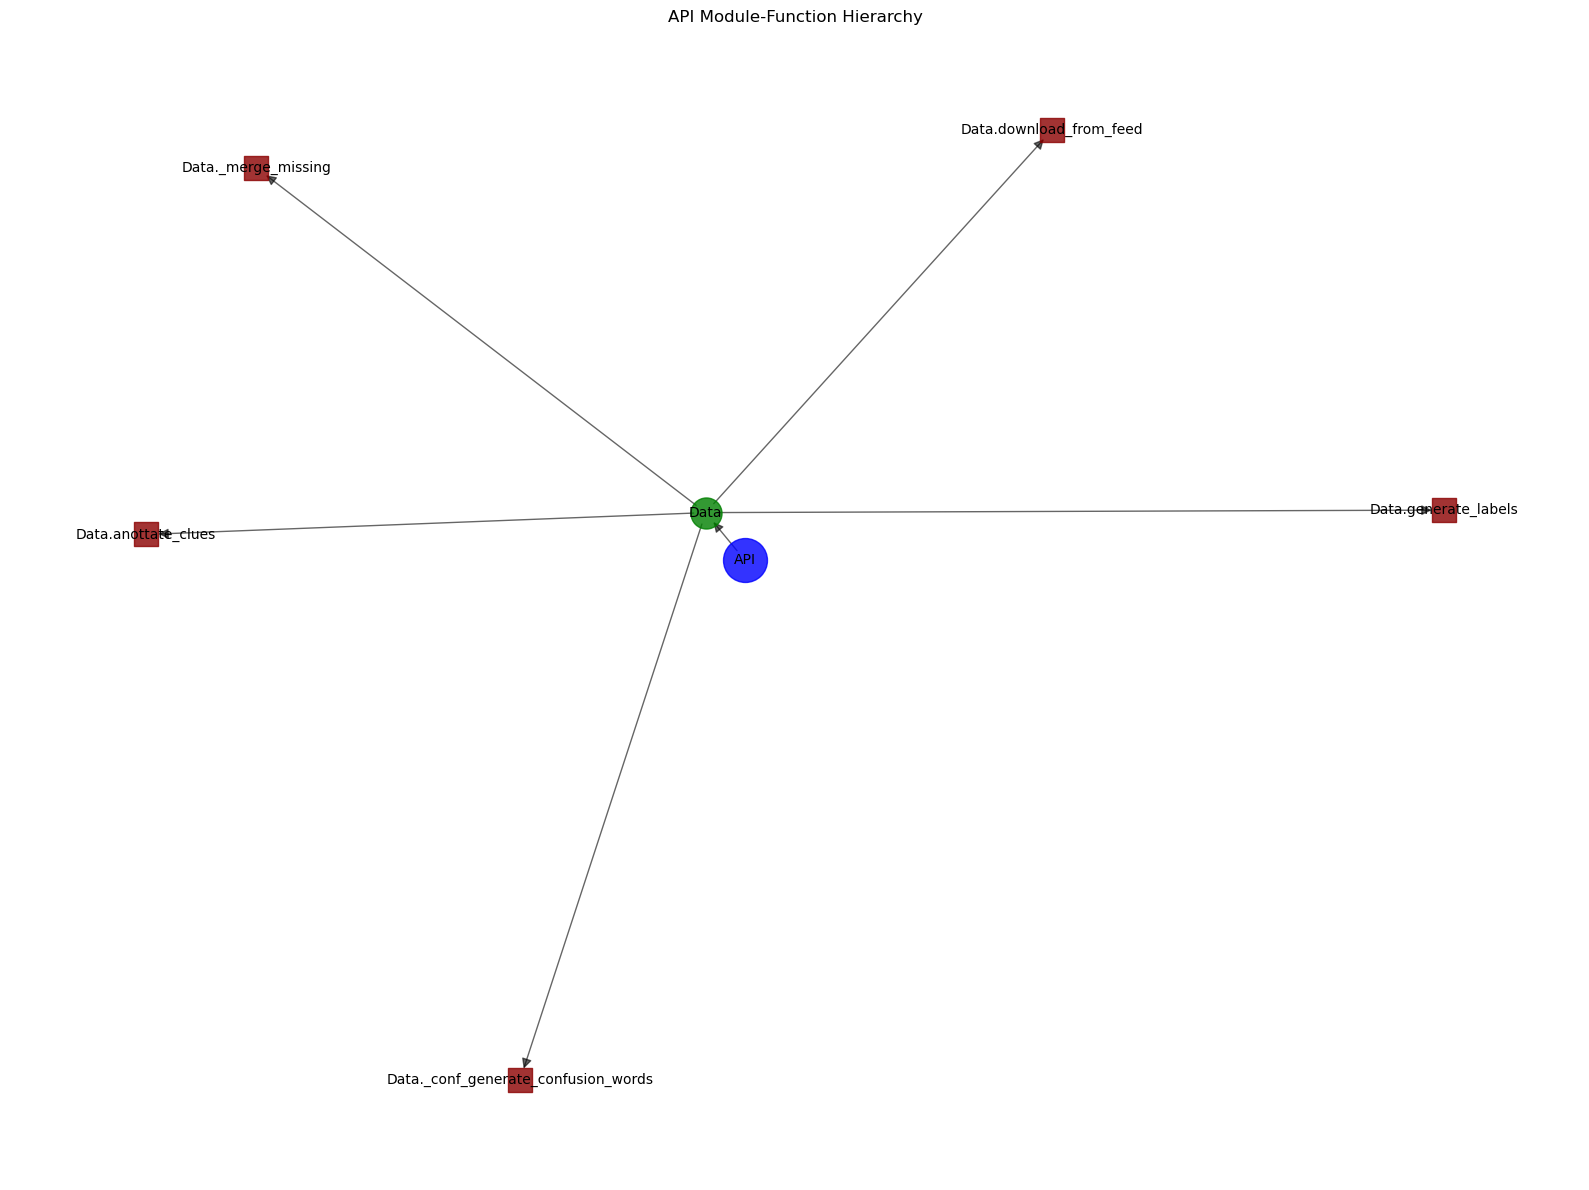

In [73]:
def get_detailed_complexity(directory):
    result = subprocess.run([sys.executable, "-m", "radon", "cc", directory, "-j"], capture_output=True, text=True)
    try:
        data = json.loads(result.stdout)
    except json.JSONDecodeError:
        print(f"Error parsing JSON output from radon for {directory}")
        return {}
    module_data = {}
    for file_path, functions in data.items():
        path_parts = Path(file_path).parts
        module = path_parts[1] if len(path_parts) > 1 else Path(file_path).stem
        if module.startswith('_'):
            continue
        if module not in module_data:
            module_data[module] = []
        for func in functions:
            module_data[module].append({
                'name': func['name'],
                'complexity': func['complexity'],
                'rank': func['rank']
            })
    return module_data

api_detailed = get_detailed_complexity(os.path.join('..', 'Data', 'api'))

def create_hierarchy_view(detailed_data, title):
    if not detailed_data:
        print(f"No detailed complexity data available for {title}")
        return
    G = nx.DiGraph()
    G.add_node(title, type='root')

    def get_color(comp):
        if comp > 15:
            return 'darkred'
        elif comp > 10:
            return 'red'
        elif comp > 5:
            return 'orange'
        else:
            return 'green'

    for module, functions in detailed_data.items():
        if functions:
            avg_comp = sum(f['complexity'] for f in functions) / len(functions)
            G.add_node(module, type='module', complexity=avg_comp, color=get_color(avg_comp))
            G.add_edge(title, module)
            top_funcs = sorted(functions, key=lambda x: x['complexity'], reverse=True)[:5]
            for func in top_funcs:
                node_name = f"{module}.{func['name']}"
                G.add_node(node_name, type='function', complexity=func['complexity'], color=get_color(func['complexity']))
                G.add_edge(module, node_name)

    try:
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
    except Exception as e:
        print("pygraphviz not available; falling back to spring layout")
        pos = nx.spring_layout(G, k=0.3, iterations=50)

    plt.figure(figsize=(16, 12))
    root_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'root']
    module_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'module']
    function_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'function']
    nx.draw_networkx_nodes(G, pos, nodelist=root_nodes, node_size=1000, node_color='blue', alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=module_nodes, node_size=500, 
                           node_color=[G.nodes[n]['color'] for n in module_nodes], alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=function_nodes, node_size=300, 
                           node_color=[G.nodes[n]['color'] for n in function_nodes], alpha=0.8, node_shape='s')
    nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=15, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title(f"{title} Module-Function Hierarchy")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"{title.lower()}_hierarchy.png", dpi=300, bbox_inches='tight')
    plt.show()

create_hierarchy_view(api_detailed, "API")